# Yahoo Finance

### Description:

### Resources:
- https://algotrading101.com/learn/yahoo-finance-api-guide/
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
- https://data-flair.training/blogs/stock-price-prediction-machine-learning-project-in-python/
- Seaborn Documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html


### Preparations:

In [16]:
# ------------------------- IMPORTS --------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from datetime import date
from sklearn import ensemble
from sklearn.ensemble import IsolationForest
# from keras.models import Sequential
# from keras.layers import LSTM,Dropout,Dense # TODO : pip3 install tensorflow
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# ------------------------- DATASET ---------------------------
ds = pd.read_csv('stocks.csv')
columns = ['Date', 'Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume', 'Ticker']
ds.columns = columns
print('FIELDS :     ' + str(columns))
print('TICKERS :      ' + str(ds['Ticker'].unique()))

FIELDS :     ['Date', 'Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume', 'Ticker']
TICKERS :      ['AMZN' 'AAPL' 'TSLA' 'SNAP' 'SBUX' 'META' 'TWTR' 'NFLX' 'MSFT' 'GME'
 'AMC' 'DIS' 'BAC' 'F' 'SPOT' 'V']


In [10]:
# ------------------------- ASSIST FUNCTIONS --------------------------
def numeric_date(date):
    d = str(date)
    return int(d[0:4] + d[5:7] + d[8:10])

def getyear_date(date):
    d = str(date)
    return int(d[0:4])

def best_time_formatting(date):
    dt.datetime.strptime(date, "%Y-%m-%d").date()

def plot_xdate(x, y):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.plot(x, y)
    plt.gcf().autofmt_xdate()
    # plt.show()

# ------------------------- DATASET REFORMATTING --------------------------
# ds['Date'] = list(map(lambda x: best_time_formatting(x) ,ds['Date']))
ds['Margin'] = ds['High'] - ds['Low'] #difference between higghest and lowest
ds['Difference'] = abs(ds['Open'] - ds['Close']) #difference between start and close values
ds['Value@Close'] = ds['Volume'] * ds['Close'] #difference between start and close values
ds['PercentChange'] = round(ds['Close'] * 100 / ds['Open'], 3) - 100 #Open Value = 100 %, Close Value = x %
ds['DateOrdinal'] = pd.to_datetime(ds['Date']).apply(lambda x: x.toordinal())
ds['DateOrdinal_plt']  = [dt.datetime.strptime(i, '%Y-%M-%d').toordinal() for i in ds['Date']]



### Analysis:

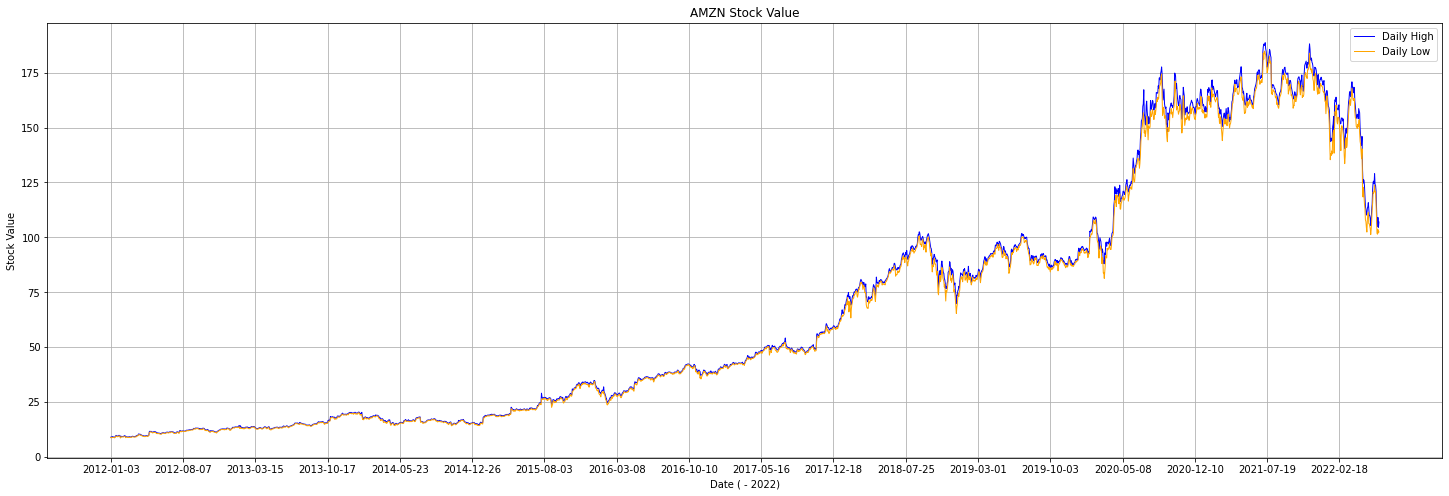

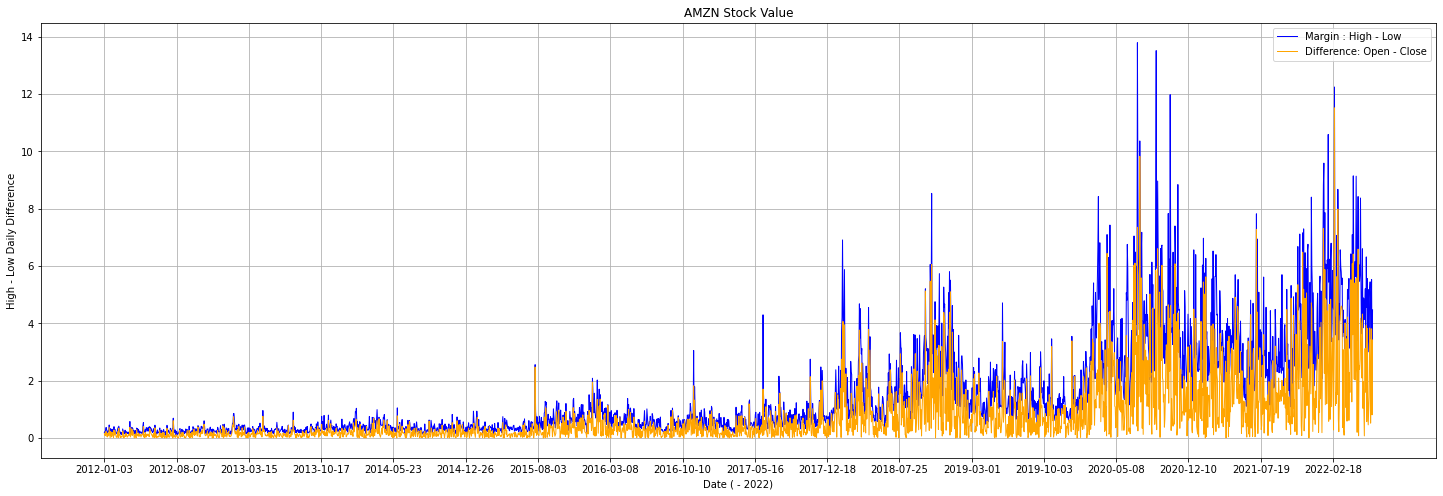

In [11]:
plt.figure(figsize = (25, 8))

ds_ = ds[ds['Ticker'] == 'AMZN']
ds_ = ds_[['Date', 'High', 'Low', 'Difference', 'Margin']]
x, y1, y2, y3, y4 = ds_['Date'], ds_['High'], ds_['Low'], ds_['Margin'], ds_['Difference']


# ------------------------------ VISUALIZATIONS --------------------------

plt.plot(x, y1, linewidth = 1., color = 'blue',  label = 'Daily High')
plt.plot(x, y2, linewidth = 1, color = 'orange', label = 'Daily Low') 
plt.xticks(np.arange(0, len(x)+1, 150))
plt.xlabel('Date ( - 2022)')
plt.ylabel('Stock Value')
plt.title('AMZN Stock Value')
plt.legend(loc = 0, frameon = 'legend_drawn_flag')
plt.grid()


plt.figure(figsize = (25, 8))
plt.plot(x, y3, linewidth = 1, color = 'blue',  label = 'Margin : High - Low')
plt.plot(x, y4, linewidth = 1, color = 'orange', label = 'Difference: Open - Close') 
plt.xticks(np.arange(0, len(x)+1, 150))
plt.xlabel('Date ( - 2022)')
plt.ylabel('High - Low Daily Difference')
plt.title('AMZN Stock Value')
plt.legend(loc = 0, frameon = 'legend_drawn_flag')
plt.grid()

Let's try to find anoamalies within the amazon stock value growth graph

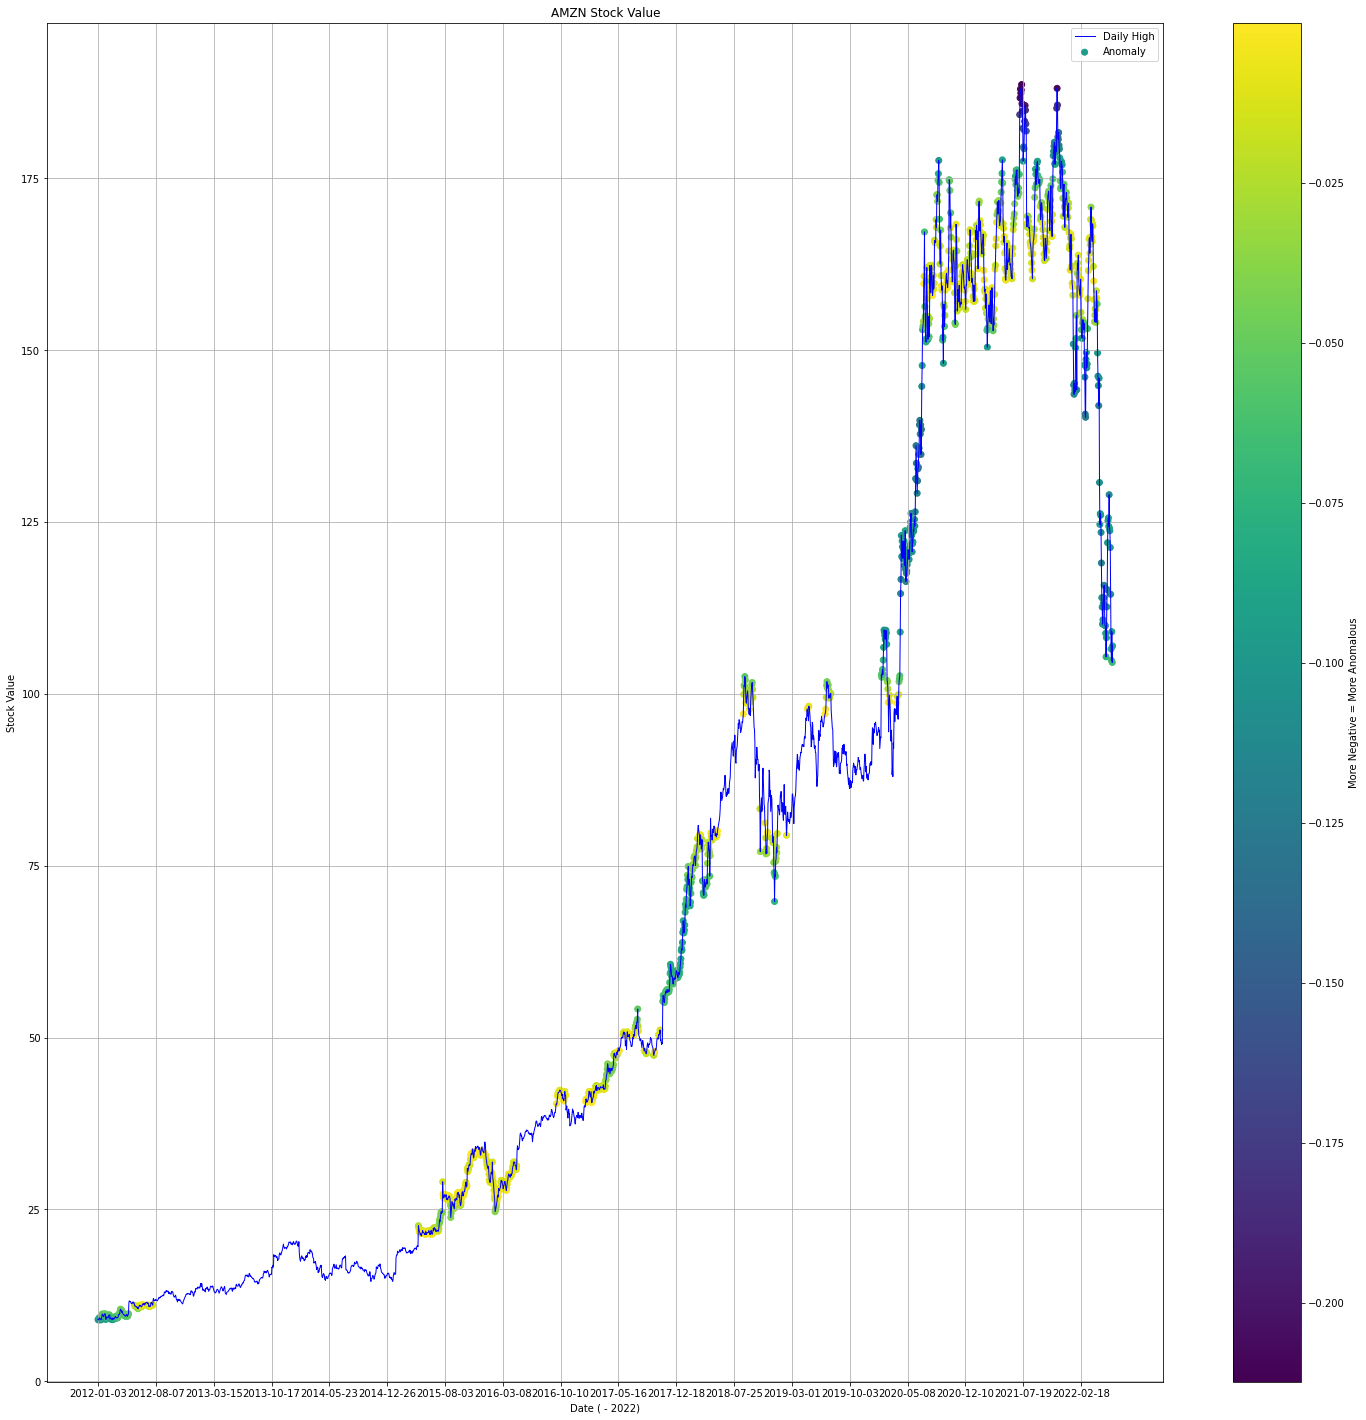

In [12]:
plt.figure(figsize = (25, 25))
model = IsolationForest()
model.fit(ds_[['High', 'Low']])
predictions = model.predict(ds_[['High', 'Low']])
ds_['Anomaly'] = predictions

outliers = ds_[ds_['Anomaly'] == -1]
anomaly_score = model.decision_function(outliers[['High', 'Low']])
plt.plot(x, y1, linewidth = 1., color = 'blue',  label = 'Daily High')
anomaly_scatter = plt.scatter(outliers['Date'], outliers['High'], c = anomaly_score, cmap = 'viridis', marker = 'o', label = 'Anomaly')
plt.colorbar(anomaly_scatter, label = 'More Negative = More Anomalous')
plt.xticks(np.arange(0, len(x)+1, 150))
plt.xlabel('Date ( - 2022)')
plt.ylabel('Stock Value')
plt.title('AMZN Stock Value')
plt.legend(loc = 0, frameon = 'legend_drawn_flag')
plt.grid()


<ipython-input-19-c6107b0c12c0>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([date.fromordinal(int(item)) for item in ax.get_xticks()])


[Text(734500.0, 0, '2011-12-29'),
 Text(735000.0, 0, '2013-05-12'),
 Text(735500.0, 0, '2014-09-24'),
 Text(736000.0, 0, '2016-02-06'),
 Text(736500.0, 0, '2017-06-20'),
 Text(737000.0, 0, '2018-11-02'),
 Text(737500.0, 0, '2020-03-16'),
 Text(738000.0, 0, '2021-07-29'),
 Text(738500.0, 0, '2022-12-11')]

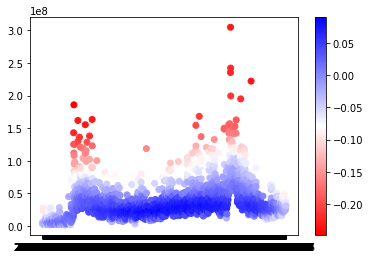

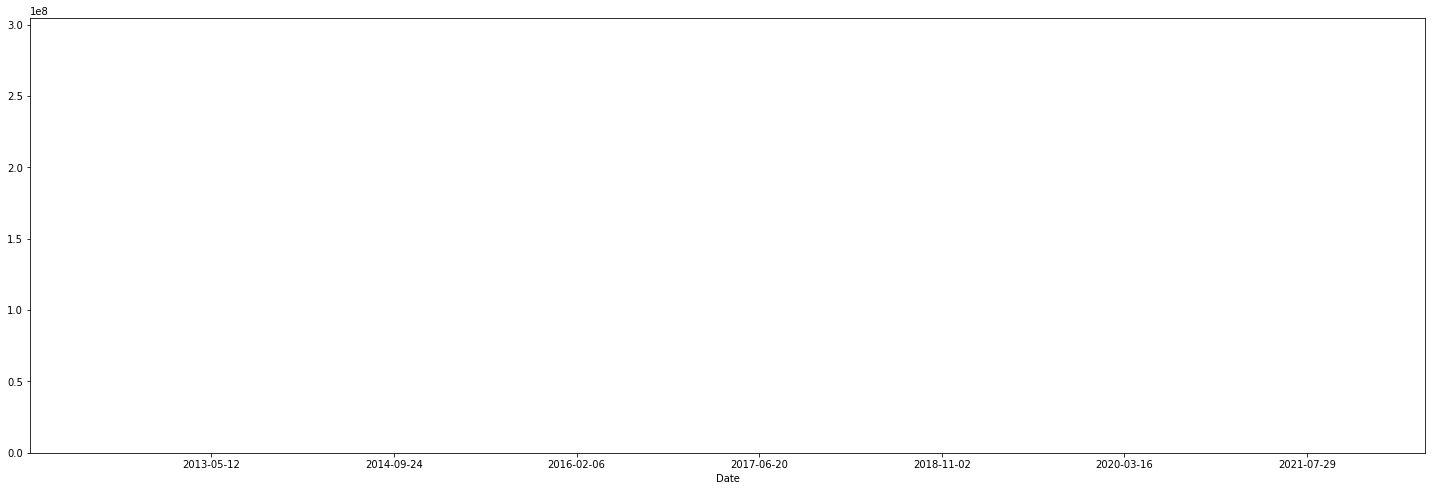

In [19]:
from sklearn.ensemble import RandomForestRegressor

ds_ = ds[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_num', 'median_house_value']]
X_train, X_test, y_train, y_test = train_test_split(ds_[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_num']], ds_['median_house_value'], test_size = 0.2, random_state = 42)
model = RandomForestRegressor(max_depth = 20, random_state = 42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize = (12, 8), constrained_layout = True)
im_1 = axes[0].scatter(X_test['longitude'], X_test['latitude'], c = y_test, cmap = 'coolwarm')
im_2 = axes[1].scatter(X_test['longitude'], X_test['latitude'], c = predictions, cmap = 'coolwarm')
axes[0].set_title('Original Prices')
axes[1].set_title('Predicted Prices')
color_bar = fig.colorbar(im_1, ax = axes[1], shrink = 0.5, label = "Housing Prices")
plt.show()

pred_test = pd.DataFrame({'test': np.array(y_test), 'predictions': list(np.array(predictions))}, columns=['test', 'predictions'])
pred_test = pred_test.sort_values(by = 'test')
ind = range(len(pred_test))
plt.figure(figsize = (25, 8))
plt.plot(ind, pred_test['predictions'], color = 'blue', linewidth = 1, label = "predictions")
plt.plot(ind, pred_test['test'], color = 'orange', linewidth = 3, label = "original")
plt.title("Accuracy Score: " + str(round(model.score(X_test,y_test), 3)), fontsize = 24, fontweight = "bold")
plt.legend()
plt.show()





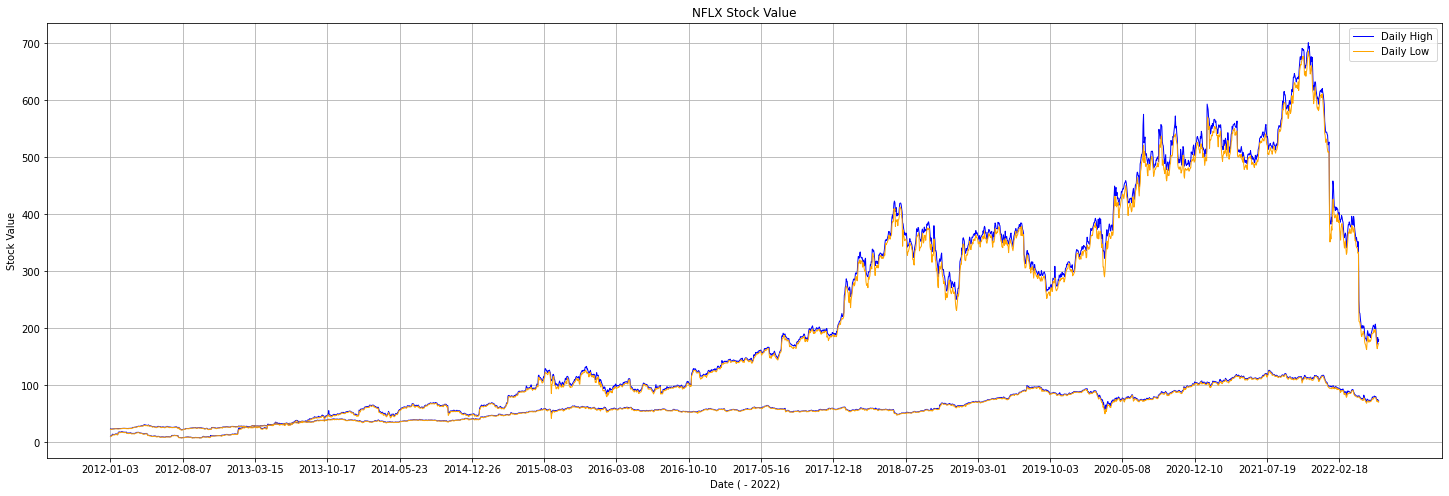

In [159]:
plt.figure(figsize = (25, 8))

ds_ = ds[ds['Ticker'] == 'NFLX']
ds_ = ds_[['Date', 'High', 'Low', 'Difference', 'Margin']]
x, y1, y2 = ds_['Date'], ds_['High'], ds_['Low']
ds_ = ds[ds['Ticker'] == 'SBUX']
ds_ = ds_[['Date', 'High', 'Low', 'Difference', 'Margin']]
x, y3, y4 = ds_['Date'], ds_['High'], ds_['Low']

# ------------------------------ VISUALIZATIONS --------------------------

plt.plot(x, y1, linewidth = 1., color = 'blue',  label = 'Daily High')
plt.plot(x, y2, linewidth = 1, color = 'orange', label = 'Daily Low') 
plt.plot(x, y3, linewidth = 1., color = 'blue')
plt.plot(x, y4, linewidth = 1, color = 'orange') 
plt.xticks(np.arange(0, len(x)+1, 150))
plt.xlabel('Date ( - 2022)')
plt.ylabel('Stock Value')
plt.title('NFLX Stock Value')
plt.legend(loc = 0, frameon = 'legend_drawn_flag')
plt.grid()



In [21]:

# import tensorflow as tf
# import keras
from keras.models import Sequential
# from keras.layers import Dense, LSTM

plt.figure(figsize = (25, 8))
#prepare dataset
ds_ = ds[['Date', 'Close']]
ds_['Date'] = pd.to_datetime(ds_.Date,format = "%Y-%m-%d")
ds_.index = ds_['Date']
ds_.drop('Date', axis = 1, inplace = True)
#normalize data: 
scaler = MinMaxScaler(feature_range = (0, 1))
ds_['Normalized'] = scaler.fit_transform(ds_)
ds_.drop('Close', axis = 1, inplace = True)
#train-test split
x, y = ds_.index, ds_['Normalized']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
# build and train LSTM N_N model
lstm_model = Sequential()
lstm_model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
lstm_model.add(LSTM(units = 50))
lstm_model.add(Dense(1))
inputs_data = ds_.values
inputs_data = inputs_data.reshape(-1, 1)
inputs_data = scaler.transform(inputs_data)
lstm_model.compile(loss = 'mean_squared_error', optimizer = 'adam')
lstm_model.fit(X_train, y_train, epochs = 1, batch_size = 1, verbose = 2)
predictions = lstm_model.predict(X_test)
plt.plot(X_train["Close"])
plt.plot(y_test)
plt.plot(predictions)
plt.show()

ImportError: Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.9/site-packages/tensorflow/python/pywrap_tensorflow.py", line 42, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import keras
  File "/opt/homebrew/lib/python3.9/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/opt/homebrew/lib/python3.9/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/opt/homebrew/Cellar/python@3.9/3.9.13_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "/opt/homebrew/Cellar/python@3.9/3.9.13_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: dlopen(/opt/homebrew/lib/python3.9/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so, 0x000E): tried: '/opt/homebrew/lib/python3.9/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64e'))


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.